In [1]:
from statsmodels.stats.weightstats import ztest
import pandas as pd
import random

C:\Program Files\anaconda\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
data= pd.read_csv("C:\\Users\\Kimo Store\\Downloads\\Telegram Desktop\\cleandata7.csv")
data.head()

,level,gender,CGPA,theoretical part,material clearness,enough practice examples,material sufficiency,ideas to improve materials,timeframe suitability,CC opnions,...,rooms/Labs are clean,rooms/Labs are big,rooms/Labs have clear board,halls suitable for gaps,suggestions for better exp,overall satisfaction,Semester time,Interactive learning effectiveness,Teamwork,suggestions for better exps
0,2,Female,303:04:00,well enough to pass0,Maybe,Agree,Maybe,It should be more simple and comprehensive,Maybe,It is too long for the semester0,...,No,No,Yes,No,Taking part in communities and competitions,60-90%,Maybe,Agree,Agree,Taking part in communities and competitions
1,3,Female,303:04:00,Very well0,Maybe,Maybe,Disagree,0,Agree0,I agree with the previous question0,...,No,No,Yes,No,To make sure that the doctors and the teaching...,30-60%,Maybe,Agree,Maybe,0
2,2,Female,303:04:00,well enough to pass0,Agree,Maybe,Maybe,Need to cover more topics or clearer informati...,Agree0,I agree with the previous question0,...,No,No,Yes,No,The rooms need to be cleaned regularly,60-90%,Maybe,Disagree,Agree,The rooms need to be cleaned regularly
3,3,Male,303:04:00,Very well0,Agree,Agree,Disagree,0,Maybe,I agree with the previous question0,...,No,No,Yes,No,Preparing the main building of the faculty as...,90-100%,Maybe,Agree,Maybe,Preparing the main building of the faculty as...
4,3,Female,303:04:00,Very well0,Maybe,Maybe,Maybe,To be more detailed than it is to depend on it,Maybe,I agree with the previous question0,...,Yes,No,Yes,No,Have more sets and please open the Library all...,60-90%,Maybe,Agree,Agree,Have more sets and please open the Library all...


# Describtive Analysis

In [3]:
data.dtypes

level                                            int64
gender                                          object
CGPA                                            object
theoretical part                                object
material clearness                              object
enough  practice examples                       object
material sufficiency                            object
ideas to improve materials                      object
timeframe suitability                           object
CC opnions                                      object
assignments relation to courses                 object
assignments measurment of knowledge             object
project discussions efficiency                  object
Attending lectures impact                       object
Labs/Classes impact                             object
suggestions for BL                              object
doctors cooporations                            object
teaching assistants cooporations                object
interactiv

## Using frequency for describtive analysis

In [4]:
freq_gender = data['gender'].value_counts()
freq_gender

Female    53
Male      46
Name: gender, dtype: int64

In [5]:
freq_CGPA=data['CGPA'].value_counts()
freq_CGPA

303:04:00      51
03:03.2        21
02:02.9        21
Less than 1     4
01:01.9         2
Name: CGPA, dtype: int64

In [6]:
freq_material_sufficiency =data['material sufficiency '].value_counts()
freq_material_sufficiency

Maybe       50
Disagree    33
Agree       16
Name: material sufficiency , dtype: int64

In [7]:
freq_material_clearness=data['material clearness'].value_counts()
freq_material_clearness

Maybe       60
Agree       27
Disagree    12
Name: material clearness, dtype: int64

### we notice that most of students are females which have high CGPA but they still see that materials could be not sufficient enough or not clear enough

In [8]:
freq_enough_practice_examples=data['enough  practice examples'].value_counts()
freq_enough_practice_examples

Maybe       44
Disagree    30
Agree       25
Name: enough  practice examples, dtype: int64

In [9]:
freq_timeframe_suitability=data['timeframe suitability'].value_counts()
freq_timeframe_suitability

Agree0       40
Maybe        39
Disagree0    20
Name: timeframe suitability, dtype: int64

### we also notice that there might be not enough practical examples although the time frame is quiet suitable so professors must consider increasing the practical examples

## Using Mode for Descriptive Analysis

In [10]:
mode_assignments_relation_to_courses  = data['assignments relation to courses'].mode()
mode_assignments_relation_to_courses

0    Agree
dtype: object

In [11]:
mode_assignments_measurment_of_knowledge=data['assignments measurment of knowledge'].mode()
mode_assignments_measurment_of_knowledge

0    Maybe
dtype: object

### we notice that assignments are related to courses but they are not enough ti measure the knowledge of students 

In [12]:
mode_learning_environment_can_affect_performance=data['learning environment can affect  performance'].mode()
mode_learning_environment_can_affect_performance

0    Yes
dtype: object

In [13]:
mode_rooms_Labs_are_clean=data['rooms/Labs are clean '].mode()
mode_rooms_Labs_are_clean

0    Yes
dtype: object

In [14]:
mode_rooms_Labs_are_big=data['rooms/Labs are big  '].mode()
mode_rooms_Labs_are_big

0    No
dtype: object

In [15]:
mode_rooms_Labs_have_clear_board =data['rooms/Labs have clear board'].mode()
mode_rooms_Labs_have_clear_board

0    Yes
dtype: object

In [16]:
mode_halls_suitable_for_gaps =data['halls suitable for gaps '].mode()
mode_halls_suitable_for_gaps

0    No
dtype: object

### we also notice that students see that working environment can affect thier performance and they think that halls are clean and have clear boards but they are not big enough or suitable for gaps

## Using Percentages for Descriptive Analysis

In [17]:
percentages_soft_skills  = data['soft skills '].value_counts(normalize=True) * 100
percentages_soft_skills

Yes    52.525253
No     47.474747
Name: soft skills , dtype: float64

### we notice that almost 52% of students have soft skills but there are alot of other students need to build thier soft skills

In [18]:
percentages_courses_related_to_jobs=data['courses related to jobs'].value_counts(normalize=True) * 100
percentages_courses_related_to_jobs

No     59.59596
Yes    40.40404
Name: courses related to jobs, dtype: float64

### we notice that almost 60% of students see that courses are not related to jobs

## Using Cross Tabulation (Contingency Table) for Descriptive Analysis

In [19]:
cross_gen_gpa = pd.crosstab(data['gender'], data['CGPA'])
cross_gen_gpa

CGPA,01:01.9,02:02.9,03:03.2,303:04:00,Less than 1
gender,,,,,
Female,1,8,14,28,2
Male,1,13,7,23,2


### we notice that females have higher CGPA than males so may be gender can affect CGPA

In [20]:
cross_doc_ass_coop=pd.crosstab(data['doctors cooporations '],data['teaching assistants cooporations'])
cross_doc_ass_coop

teaching assistants cooporations,Always cooperative0,Never cooperative0,"Very cooperative in campus, not so cooperative online0","Very cooperative online, not so cooperative in campus0"
doctors cooporations,,,,
Always cooperative0,22,2,4,0
Never cooperative0,2,5,5,2
"Very cooperative in campus, not so cooperative online0",22,2,17,7
"Very cooperative online, not so cooperative in campus0",1,0,3,5


### we notice the relation between doctors and assistants cooperation in helping students which mean that in most cases a cooporative doctor has a cooperative assistant

In [21]:
cross_int_tech_impact=pd.crosstab(data['interactive teaching techniques'],data['interactive techniques impact'])
cross_int_tech_impact

interactive techniques impact,No,Yes
interactive teaching techniques,,
Agree,2,15
Disagree,2,12
Some of them,4,64


### we notice that interactive teaching techniques have high impact on students 

# Inferential Statistics

## Chi_square Test for Inferential Statistics

In [22]:
import scipy.stats as stats

In [23]:
#Perform a chi-square test to determine if there is a significant association between the two categorical variables. 
#The chi-square test evaluates the null hypothesis that the two variables are independent.
chi2, p_value,gen,gpa = stats.chi2_contingency(cross_gen_gpa)
print("Chi-square value:", chi2)
print("p-value:", p_value)

Chi-square value: 3.5367379929822627
p-value: 0.47231428372065243


### we will assume that significance level=0.05 so from the above p_value, we will reject null hypothesis and accept the alternative one which prove that there is a relation between gender and gpa

In [24]:
chi2, p_value,int_,tech = stats.chi2_contingency(cross_int_tech_impact)
print("Chi-square value:", chi2)
print("p-value:", p_value)

Chi-square value: 1.4787376489057165
p-value: 0.4774151532146448


### we will assume that significance level=0.05 so from the above p_value, we will reject null hypothesis and accept the alternative one which prove that interactive teaching techniques have impact on students

# Correlation Analysis

### To measure the correlation coefficient between two categorical variables, you can use a statistical measure called Cramer's V. Cramer's V is a widely used measure of association between two categorical variables. It ranges from 0 to 1, with higher values indicating stronger association between the variables.***

The main assumptions are:

(1)The observations are independent.

(2)The expected frequency count for each cell in the contingency table is at least 5

In [25]:
from scipy.stats import chi2_contingency
import numpy as np

In [26]:
# create a contingency table of the level and material clearness variables
table = pd.crosstab(data['level'], data['material clearness'])

# calculate the chi-squared statistic and related values
chi2, p, dof, expected = chi2_contingency(table)

# calculate Cramer's V
n = np.sum(table)
phi2 = chi2/n
r, k = table.shape
phi2corr = np.maximum(0, phi2 - ((k-1)*(r-1))/(n-1))
r_corr = r - ((r-1)**2)/(n-1)
k_corr = k - ((k-1)**2)/(n-1)
v = np.sqrt(phi2corr/np.minimum((k_corr-1),(r_corr-1)))

# print the contingency table and Cramer's V
print(table)
print("Cramer's V:", v)

material clearness  Agree  Disagree  Maybe
level                                     
1                       8         1     15
2                       8         4     15
3                      10         4     25
4                       1         3      5
Cramer's V: material clearness
Agree       0.056501
Disagree    0.000000
Maybe       0.049859
dtype: float64


### Conclusion: No Correlation Between Level & Mterial Clearness. Therefore, There is no Change in Material Perceptiion as The Years Passes by

In [27]:
# create a contingency table of the level and overall satisfaction variables
table = pd.crosstab(data['level'], data['overall satisfaction  '])

# calculate the chi-squared statistic and related values
chi2, p, dof, expected = chi2_contingency(table)

# calculate Cramer's V
n = np.sum(table)
phi2 = chi2/n
r, k = table.shape
phi2corr = np.maximum(0, phi2 - ((k-1)*(r-1))/(n-1))
r_corr = r - ((r-1)**2)/(n-1)
k_corr = k - ((k-1)**2)/(n-1)
v = np.sqrt(phi2corr/np.minimum((k_corr-1),(r_corr-1)))

# print the contingency table and Cramer's V
print(table)
print("Cramer's V:", v)

overall satisfaction    0-30%  30-60%  60-90%  90-100%
level                                                 
1                           2       9      12        1
2                           4       7      15        1
3                           7      18       9        5
4                           4       4       1        0
Cramer's V: overall satisfaction  
0-30%      0.431343
30-60%     0.276847
60-90%     0.280789
90-100%    0.803103
dtype: float64


### Conclusion: High Level Correlation Between Highh Satisfaction And Level

# Regression Analysis

## linear Regression

In [28]:
# Convert the 'material clearness' column to binary variables
data[['material_clearness_Maybe', 'material_clearness_Agree', 'material_clearness_Disagree']] = pd.get_dummies(data['material clearness'])

# Convert the 'CGPA' column to numerical values
cgpa_categories = ['Less than 1', '1:00:00-1:59:59', '2:00:00-2:59:59', '3:00:00-3:59:59', '4:00:00-4:59:59', '5:00:00-5:59:59']
data['CGPA'] = pd.Categorical(data['CGPA'], categories=cgpa_categories)
data['CGPA'] = data['CGPA'].cat.codes

# Define the variables
x = data[['material_clearness_Maybe', 'material_clearness_Agree', 'material_clearness_Disagree']]
y = data['CGPA']

# Perform the regression analysis
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x, y)

# Print the coefficients
print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)

# Make a prediction
prediction = model.predict(pd.DataFrame({'material_clearness_Maybe': [0], 'material_clearness_Agree': [1], 'material_clearness_Disagree': [0]}))
print('Prediction:', prediction)

Intercept: 8401039014246.986
Coefficients: [-8.40103901e+12 -8.40103901e+12 -8.40103901e+12]
Prediction: [-0.75]


In [29]:
# The intercept is the value of the dependent variable (y) when all of the independent variables (x) are equal to 0.
#it is the value of y that we would expect when all of the independent variables have no effect on the dependent variable.
# The intercept is also sometimes called the constant term or the bias term.

# The coefficients represent the change in the dependent variable (y) for a one-unit increase in each
#             of the independent variables (x).
# predictions for new observations by estimating the value of the dependent variable based on the values independent variabless.

In [30]:
# this indicats that the linear regression model doesn't fit so we will use the logistic model

## Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [32]:
# Load the data
data = pd.read_csv("C:\\Users\\Kimo Store\\Downloads\\Telegram Desktop\\cleandata7.csv")

# Convert the 'material clearness' column to binary variables
data[['material_clearness_Maybe', 'material_clearness_Agree', 'material_clearness_Disagree']] = pd.get_dummies(data['material clearness'])

# Convert the 'CGPA' column to numerical values
cgpa_categories = ['Less than 1', '1:00:00-1:59:59', '2:00:00-2:59:59', '3:00:00-3:59:59', '4:00:00-4:59:59', '5:00:00-5:59:59']
data['CGPA_cat'] = pd.Categorical(data['CGPA'], categories=cgpa_categories).codes

# Define the variables
x = data[['material_clearness_Maybe', 'material_clearness_Agree', 'material_clearness_Disagree']]
y = data['CGPA_cat']

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Fit a logistic regression model
model = LogisticRegression(random_state=42)
model.fit(x_train, y_train)

# Print the intercept and coefficients for each category of the dependent variable
print('Intercepts:', model.intercept_)
print('Coefficients:', model.coef_)

# Make a prediction for a new observation
new_observation = pd.DataFrame({'material_clearness_Maybe': [0], 'material_clearness_Agree': [1], 'material_clearness_Disagree': [0]})
new_obs_pred = model.predict(new_observation)
#print('New observation:', new_observation.to_dict())
print('Prediction:', new_obs_pred)

Intercepts: [-2.79527803]
Coefficients: [[-0.7039678   1.24684441 -0.54287659]]
Prediction: [-1]


# Validation

In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 1.0
Precision: 0.0
Recall: 0.0


C:\Program Files\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Program Files\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [34]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, x, y, cv=5)
print("Cross-Validation Scores:", scores)
print("Mean CV Score:", scores.mean())

Cross-Validation Scores: [0.95 0.95 0.95 0.95 1.  ]
Mean CV Score: 0.96


C:\Program Files\anaconda\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


# Data Reliability

In [35]:
data= pd.read_csv("C:\\Users\\Kimo Store\\Downloads\\Telegram Desktop\\cleandata7.csv")
data.head()

,level,gender,CGPA,theoretical part,material clearness,enough practice examples,material sufficiency,ideas to improve materials,timeframe suitability,CC opnions,...,rooms/Labs are clean,rooms/Labs are big,rooms/Labs have clear board,halls suitable for gaps,suggestions for better exp,overall satisfaction,Semester time,Interactive learning effectiveness,Teamwork,suggestions for better exps
0,2,Female,303:04:00,well enough to pass0,Maybe,Agree,Maybe,It should be more simple and comprehensive,Maybe,It is too long for the semester0,...,No,No,Yes,No,Taking part in communities and competitions,60-90%,Maybe,Agree,Agree,Taking part in communities and competitions
1,3,Female,303:04:00,Very well0,Maybe,Maybe,Disagree,0,Agree0,I agree with the previous question0,...,No,No,Yes,No,To make sure that the doctors and the teaching...,30-60%,Maybe,Agree,Maybe,0
2,2,Female,303:04:00,well enough to pass0,Agree,Maybe,Maybe,Need to cover more topics or clearer informati...,Agree0,I agree with the previous question0,...,No,No,Yes,No,The rooms need to be cleaned regularly,60-90%,Maybe,Disagree,Agree,The rooms need to be cleaned regularly
3,3,Male,303:04:00,Very well0,Agree,Agree,Disagree,0,Maybe,I agree with the previous question0,...,No,No,Yes,No,Preparing the main building of the faculty as...,90-100%,Maybe,Agree,Maybe,Preparing the main building of the faculty as...
4,3,Female,303:04:00,Very well0,Maybe,Maybe,Maybe,To be more detailed than it is to depend on it,Maybe,I agree with the previous question0,...,Yes,No,Yes,No,Have more sets and please open the Library all...,60-90%,Maybe,Agree,Agree,Have more sets and please open the Library all...


## Converting data to category

In [36]:
data["gender"]=data["gender"].astype('category')
data["CGPA"]=data["CGPA"].astype('category')
data["theoretical part "]=data["theoretical part "].astype('category')
data["material clearness"]=data["material clearness"].astype('category')
data["enough  practice examples"]=data["enough  practice examples"].astype('category')
data["material sufficiency "]=data["material sufficiency "].astype('category')
data["timeframe suitability"]=data["timeframe suitability"].astype('category')
data["assignments relation to courses"]=data["assignments relation to courses"].astype('category')
data["assignments measurment of knowledge"]=data["assignments measurment of knowledge"].astype('category')
data["project discussions efficiency"]=data["project discussions efficiency"].astype('category')
data["Attending lectures impact"]=data["Attending lectures impact"].astype('category')
data["Labs/Classes impact"]=data["Labs/Classes impact"].astype('category')
data["doctors cooporations "]=data["doctors cooporations "].astype('category')
data["teaching assistants cooporations"]=data["teaching assistants cooporations"].astype('category')
data["interactive teaching techniques"]=data["interactive teaching techniques"].astype('category')
data["interactive techniques impact"]=data["interactive techniques impact"].astype('category')
data["courses related to jobs"]=data["courses related to jobs"].astype('category')
data["courses qualifies students "]=data["courses qualifies students "].astype('category')
data["soft skills "]=data["soft skills "].astype('category')
data["learning environment can affect  performance"]=data["learning environment can affect  performance"].astype('category')
data["rooms/Labs are clean "]=data["rooms/Labs are clean "].astype('category')
data["rooms/Labs are big  "]=data["rooms/Labs are big  "].astype('category')
data["rooms/Labs have clear board"]=data["rooms/Labs have clear board"].astype('category')
data["halls suitable for gaps "]=data["halls suitable for gaps "].astype('category')
data["overall satisfaction  "]=data["overall satisfaction  "].astype('category')
data["Semester time  "]=data["Semester time  "].astype('category')
data["Interactive learning  effectiveness"]=data["Interactive learning  effectiveness"].astype('category')
data["Teamwork "]=data["Teamwork "].astype('category')
data.dtypes

level                                              int64
gender                                          category
CGPA                                            category
theoretical part                                category
material clearness                              category
enough  practice examples                       category
material sufficiency                            category
ideas to improve materials                        object
timeframe suitability                           category
CC opnions                                        object
assignments relation to courses                 category
assignments measurment of knowledge             category
project discussions efficiency                  category
Attending lectures impact                       category
Labs/Classes impact                             category
suggestions for BL                                object
doctors cooporations                            category
teaching assistants cooporation

## Encoding data

In [38]:
data_encode=pd.DataFrame()
data_encode["gender"]=data["gender"].cat.codes
data_encode["CGPA"]=data["CGPA"].cat.codes
data_encode["theoretical part "]=data["theoretical part "].cat.codes
data_encode["material clearness"]=data["material clearness"].cat.codes
data_encode["enough  practice examples"]=data["enough  practice examples"].cat.codes
data_encode["material sufficiency "]=data["material sufficiency "].cat.codes
data_encode["timeframe suitability"]=data["timeframe suitability"].cat.codes
data_encode["assignments relation to courses"]=data["assignments relation to courses"].cat.codes
data_encode["assignments measurment of knowledge"]=data["assignments measurment of knowledge"].cat.codes
data_encode["project discussions efficiency"]=data["project discussions efficiency"].cat.codes
data_encode["Attending lectures impact"]=data["Attending lectures impact"].cat.codes
data_encode["Labs/Classes impact"]=data["Labs/Classes impact"].cat.codes
data_encode["doctors cooporations "]=data["doctors cooporations "].cat.codes
data_encode["teaching assistants cooporations"]=data["teaching assistants cooporations"].cat.codes
data_encode["interactive teaching techniques"]=data["interactive teaching techniques"].cat.codes
data_encode["interactive techniques impact"]=data["interactive techniques impact"].cat.codes
data_encode["courses related to jobs"]=data["courses related to jobs"].cat.codes
data_encode["courses qualifies students "]=data["courses qualifies students "].cat.codes
data_encode["soft skills "]=data["soft skills "].cat.codes
data_encode["learning environment can affect  performance"]=data["learning environment can affect  performance"].cat.codes
data_encode["rooms/Labs are clean "]=data["rooms/Labs are clean "].cat.codes
data_encode["rooms/Labs are big  "]=data["rooms/Labs are big  "].cat.codes
data_encode["rooms/Labs have clear board"]=data["rooms/Labs have clear board"].cat.codes
data_encode["halls suitable for gaps "]=data["halls suitable for gaps "].cat.codes
data_encode["overall satisfaction  "]=data["overall satisfaction  "].cat.codes
data_encode["Semester time  "]=data["Semester time  "].cat.codes
data_encode["Interactive learning  effectiveness"]=data["Interactive learning  effectiveness"].cat.codes
data_encode["Teamwork "]=data["Teamwork "].cat.codes

## Calculating Reliability

In [46]:
!pip install krippendorff
from krippendorff import alpha

alpha_value = alpha(data_encode)
alpha_value

0.340487197998403

### We see that it's a very low reliability so we will drop some columns and try to improve it

In [80]:
data_encode1=data_encode.drop(['material clearness','enough  practice examples','material sufficiency ','timeframe suitability','assignments relation to courses','assignments measurment of knowledge','project discussions efficiency','Attending lectures impact','Labs/Classes impact','doctors cooporations ','teaching assistants cooporations','interactive teaching techniques','interactive techniques impact','courses qualifies students ','soft skills ','learning environment can affect  performance','rooms/Labs are clean ','rooms/Labs have clear board','overall satisfaction  ','Semester time  ','Interactive learning  effectiveness','Teamwork '],axis=1)
data_encode1

,gender,CGPA,theoretical part,courses related to jobs,rooms/Labs are big,halls suitable for gaps
0,0,3,3,1,0,0
1,0,3,2,0,0,0
2,0,3,3,1,0,0
3,1,3,2,1,0,0
4,0,3,2,0,0,0
...,...,...,...,...,...,...
94,1,3,3,0,0,1
95,0,2,3,0,0,0
96,1,1,1,0,1,0
97,1,2,2,1,1,1


In [81]:
alpha_value = alpha(data_encode1)
alpha_value

0.7268448260842052

### We see that this one is much better

# Data Visualization

<function matplotlib.pyplot.show(close=None, block=None)>

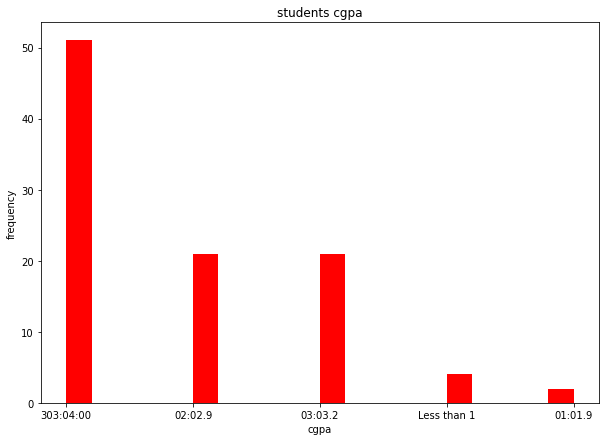

In [40]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
x = data["CGPA"]
plt.hist(x, bins= 20, color="red")
plt.title("students cgpa")
plt.xlabel("cgpa")
plt.ylabel("frequency")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

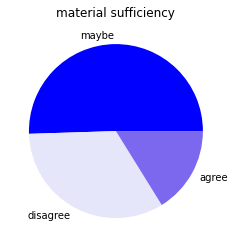

In [41]:
plt.pie([50,33,16], labels=['maybe','disagree','agree'], colors=['#0000FF','#E6E6FA','#7B68EE'])
plt.title('material sufficiency')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

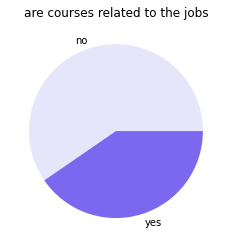

In [42]:
plt.pie([59,40], labels=['no','yes'], colors=['#E6E6FA','#7B68EE'])
plt.title('are courses related to the jobs')
plt.show

### in the last two plots above we can that the majority of students tend to think that the courses materials are not very great also see that it does not meet jobs needs so, one of the things that can be taken in consideration is updating the courses content 

<function matplotlib.pyplot.show(close=None, block=None)>

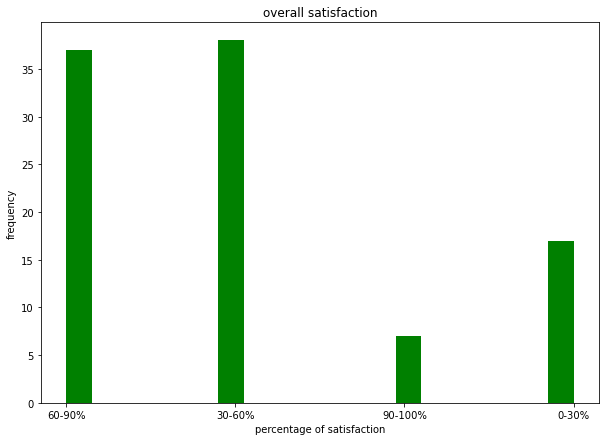

In [43]:
plt.figure(figsize=(10,7))
x = data["overall satisfaction  "]
plt.hist(x, bins= 20, color="green")
plt.title("overall satisfaction")
plt.xlabel("percentage of satisfaction")
plt.ylabel("frequency")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

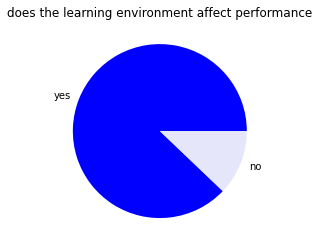

In [44]:
plt.pie([87,12], labels=['yes','no'], colors=['#0000FF','#E6E6FA'])
plt.title('does the learning environment affect performance')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

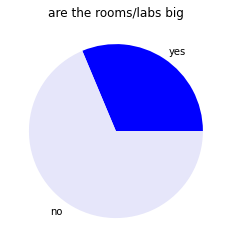

In [45]:
plt.pie([31,68], labels=['yes','no'], colors=['#0000FF','#E6E6FA'])
plt.title('are the rooms/labs big')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

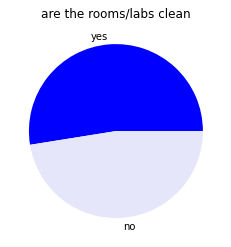

In [46]:
plt.pie([52,47], labels=['yes','no'], colors=['#0000FF','#E6E6FA'])
plt.title('are the rooms/labs clean')
plt.show

### in the last 3 plots above we see that nearly all the students agree that the learning environment does affect the performance and they do not see that the rooms or the labs are big enough and half of them see that it is not even clean so, working on the rooms and the labs maybe able to help improve students performance

<function matplotlib.pyplot.show(close=None, block=None)>

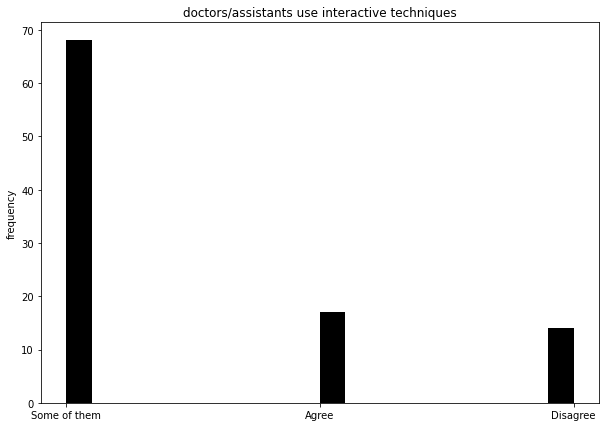

In [47]:
plt.figure(figsize=(10,7))
x = data["interactive teaching techniques"]
plt.hist(x, bins= 20, color="black")
plt.title("doctors/assistants use interactive techniques")
plt.xlabel("")
plt.ylabel("frequency")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

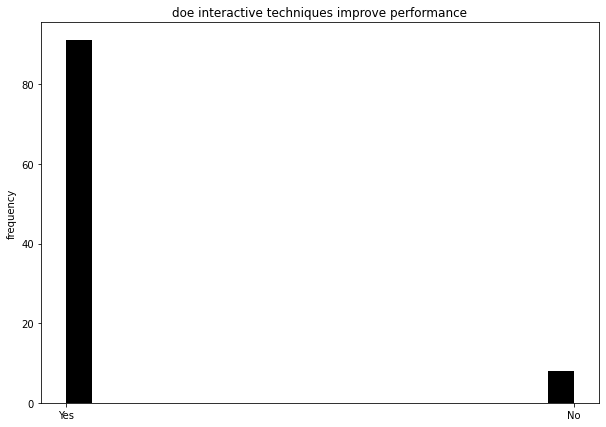

In [48]:
plt.figure(figsize=(10,7))
x = data["interactive techniques impact"]
plt.hist(x, bins= 20, color="black")
plt.title("doe interactive techniques improve performance")
plt.xlabel("")
plt.ylabel("frequency")
plt.show

### in the above two plots we see that nearly all the students can agree that using interactive techniques can improve performance and see that not all of the doctors or assistants use these techniques 

# Interpretation

### from the above we concluted that :
### 1) gender might affect CGPA , so we need to search deeper and find the reason
### 2) Interactive teaching techniques are quite important so we need to focus on changing the traditional techniques
### 3) Halls are clean but they need to be bigger and we need to increase suitable places for gaps
### 4) Cooperative professor often means cooperative staff, so we must focus on choosing the right professor and staff
### 5) Semester time is good but practical examples are not enough so we might consider increasing practical examples
### 6) Increasing practical examples might increase material clearness as it's not very good